# Análise de Inadimplência - Hedy Lammarr

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

c:\Users\thzli\OneDrive\Documentos\Inadimplencia\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset('thzliaa/inadimplencia')
df = dataset['train'].to_pandas()

In [3]:
df.shape

(1686921, 14)

In [4]:
df.head()

,data_base,uf,tcb,sr,cliente,ocupacao,porte,modalidade,origem,indexador,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,2022-01-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,PF - Até 1 salário mínimo,PF - Cartão de crédito,Sem destinação específica,Prefixado,"90125,10","1286959,83","61257,40","87986,69"
1,2022-01-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,PF - Até 1 salário mínimo,PF - Empréstimo com consignação em folha,Sem destinação específica,Prefixado,"77422,97","11023722,25","294296,90","304295,74"
2,2022-01-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,PF - Até 1 salário mínimo,PF - Empréstimo com consignação em folha,Sem destinação específica,Pós-fixado,"12742,72","12742,72","12742,72","12742,72"
3,2022-01-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,PF - Até 1 salário mínimo,PF - Empréstimo sem consignação em folha,Sem destinação específica,Prefixado,"27829,40","914430,04","81015,85","100983,87"
4,2022-01-31,AC,Bancário,S1,PF,PF - Aposentado/pensionista,PF - Até 1 salário mínimo,PF - Habitacional,Com destinação específica,Pós-fixado,"482,45","218898,88","0,00","0,00"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686921 entries, 0 to 1686920
Data columns (total 14 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   data_base                       1686921 non-null  object
 1   uf                              1686921 non-null  object
 2   tcb                             1686921 non-null  object
 3   sr                              1686921 non-null  object
 4   cliente                         1686921 non-null  object
 5   ocupacao                        1686921 non-null  object
 6   porte                           1686921 non-null  object
 7   modalidade                      1686921 non-null  object
 8   origem                          1686921 non-null  object
 9   indexador                       1686921 non-null  object
 10  vencido_acima_de_15_dias        1686921 non-null  object
 11  carteira_ativa                  1686921 non-null  object
 12  carteira_inadi

In [6]:
df.isnull().sum()

data_base                         0
uf                                0
tcb                               0
sr                                0
cliente                           0
ocupacao                          0
porte                             0
modalidade                        0
origem                            0
indexador                         0
vencido_acima_de_15_dias          0
carteira_ativa                    0
carteira_inadimplida_arrastada    0
ativo_problematico                0
dtype: int64

## 🛑 Pré-Processamento

In [7]:
colunas = ['vencido_acima_de_15_dias',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico']

In [8]:
for col in colunas:
    df[col] = df[col].str.replace(',', '.').astype(float)

In [9]:
df['data_base'] = pd.to_datetime(df['data_base'], errors='coerce')

In [10]:
columns_str = ['ocupacao', 'porte', 'modalidade']

for col in columns_str:
    df[col] = df[col].str.replace('PF - ', '')
    df[col] = df[col].str.replace('PJ - ', '')

In [11]:
cols_numericas_datas = df.select_dtypes(include=["object"]).columns

unicos = {col: df[col].unique() for col in cols_numericas_datas}
unicos

{'uf': array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
        'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object),
 'tcb': array(['Bancário', 'Cooperativas', 'Não bancário'], dtype=object),
 'sr': array(['S1', 'S2', 'S3', 'S4', 'S5'], dtype=object),
 'cliente': array(['PF'], dtype=object),
 'ocupacao': array(['Aposentado/pensionista', 'Autônomo',
        'Empregado de empresa privada',
        'Empregado de entidades sem fins lucrativos', 'Empresário',
        'Servidor ou empregado público'], dtype=object),
 'porte': array(['Até 1 salário mínimo', 'Mais de 1 a 2 salários mínimos',
        'Mais de 10 a 20 salários mínimos',
        'Mais de 2 a 3 salários mínimos', 'Mais de 3 a 5 salários mínimos',
        'Mais de 5 a 10 salários mínimos'], dtype=object),
 'modalidade': array(['Cartão de crédito', 'Empréstimo com consignação em folha',
        'Empréstimo sem consignação em folha', 'Habitacio

In [12]:
df.head()

,data_base,uf,tcb,sr,cliente,ocupacao,porte,modalidade,origem,indexador,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico
0,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Cartão de crédito,Sem destinação específica,Prefixado,90125.10,1286959.83,61257.40,87986.69
1,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Empréstimo com consignação em folha,Sem destinação específica,Prefixado,77422.97,11023722.25,294296.90,304295.74
2,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Empréstimo com consignação em folha,Sem destinação específica,Pós-fixado,12742.72,12742.72,12742.72,12742.72
3,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Empréstimo sem consignação em folha,Sem destinação específica,Prefixado,27829.40,914430.04,81015.85,100983.87
4,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Habitacional,Com destinação específica,Pós-fixado,482.45,218898.88,0.00,0.00


### Criando Rótulo de Inadimplência

In [21]:
df['inadimplente'] = ((df['vencido_acima_de_15_dias'] > 0) | 
                      (df['carteira_inadimplida_arrastada'] > 0)).astype(int)

### Adicionando Mês, Ano e Região

In [13]:
df['mes'] = df['data_base'].dt.month  # Extrai o número do mês

In [14]:
meses = {
    1: 'janeiro',
    2: 'fevereiro',
    3: 'março',
    4: 'abril',
    5: 'maio',
    6: 'junho',
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}

# Cria a nova coluna com base no número do mês
df['mes_texto'] = df['mes'].map(meses)
df['mes_texto'] = df['mes_texto'].str.capitalize()

In [15]:
df['ano'] = df['data_base'].dt.year  # Extrai ano

In [16]:
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

def mapear_regiao(uf):
    for regiao, estados in regioes.items():
        if uf in estados:
            return regiao
    return 'Desconhecido'

df['regiao'] = df['uf'].apply(mapear_regiao)

In [22]:
df.columns

Index(['data_base', 'uf', 'tcb', 'sr', 'cliente', 'ocupacao', 'porte',
       'modalidade', 'origem', 'indexador', 'vencido_acima_de_15_dias',
       'carteira_ativa', 'carteira_inadimplida_arrastada',
       'ativo_problematico', 'mes', 'mes_texto', 'ano', 'regiao',
       'inadimplente'],
      dtype='object')

In [23]:
df.head()

,data_base,uf,tcb,sr,cliente,ocupacao,porte,modalidade,origem,indexador,vencido_acima_de_15_dias,carteira_ativa,carteira_inadimplida_arrastada,ativo_problematico,mes,mes_texto,ano,regiao,inadimplente
0,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Cartão de crédito,Sem destinação específica,Prefixado,90125.10,1286959.83,61257.40,87986.69,1,Janeiro,2022,Norte,1
1,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Empréstimo com consignação em folha,Sem destinação específica,Prefixado,77422.97,11023722.25,294296.90,304295.74,1,Janeiro,2022,Norte,1
2,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Empréstimo com consignação em folha,Sem destinação específica,Pós-fixado,12742.72,12742.72,12742.72,12742.72,1,Janeiro,2022,Norte,1
3,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Empréstimo sem consignação em folha,Sem destinação específica,Prefixado,27829.40,914430.04,81015.85,100983.87,1,Janeiro,2022,Norte,1
4,2022-01-31,AC,Bancário,S1,PF,Aposentado/pensionista,Até 1 salário mínimo,Habitacional,Com destinação específica,Pós-fixado,482.45,218898.88,0.00,0.00,1,Janeiro,2022,Norte,1


### Salvando arquivo gerado no pré-processamento

In [46]:
df.to_parquet('inadimplencia_2023_2025.parquet', index=False)

# 🛑 EDA

### Agrupando por modalidade de Estado

In [24]:
inadimplencia_por_estado = df.groupby('uf').agg({
    'cliente': 'count',
    'inadimplente': 'sum'
}).rename(columns={'cliente': 'quantidade_clientes'})

inadimplencia_por_estado['taxa_inadimplencia'] = (
    inadimplencia_por_estado['inadimplente'] / inadimplencia_por_estado['quantidade_clientes']
)

inadimplencia_por_estado = inadimplencia_por_estado.sort_values(by='taxa_inadimplencia', ascending=False)
inadimplencia_por_estado.head(10)

,quantidade_clientes,inadimplente,taxa_inadimplencia
uf,,,
AM,53256,40209,0.755014
BA,68142,50187,0.736506
SP,91518,66996,0.732053
RS,87114,63615,0.730250
PA,61746,44937,0.727772
PE,61416,44637,0.726798
RJ,75594,54921,0.726526
CE,60042,43464,0.723893
SC,84360,60990,0.722973


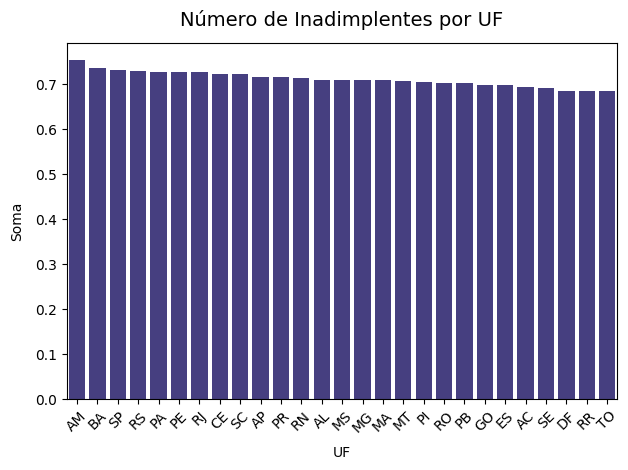

In [32]:
inadimplencia_sorted = inadimplencia_por_estado.sort_values(
    by='taxa_inadimplencia',
    ascending=False
)

sns.barplot(
    data=inadimplencia_sorted,
    x='uf',
    y='taxa_inadimplencia',
    color='#3d348b',
    
)
plt.title('Número de Inadimplentes por UF', pad=12, fontsize=14)
plt.ylabel('Soma', labelpad=8)
plt.xlabel('UF', labelpad=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Agrupando por modalidade de crédito

In [40]:
inadimplencia_modalidade = df.groupby('modalidade').agg({
    'cliente': 'count',
    'inadimplente': 'sum'
}).rename(columns={'cliente': 'quantidade_clientes'})

inadimplencia_modalidade['taxa_inadimplencia'] = (
    inadimplencia_modalidade['inadimplente'] / inadimplencia_modalidade['quantidade_clientes']
)

inadimplencia_modalidade = inadimplencia_modalidade.sort_values(by='taxa_inadimplencia', ascending=False)
inadimplencia_modalidade

,quantidade_clientes,inadimplente,taxa_inadimplencia
modalidade,,,
Cartão de crédito,374001,308169,0.823979
Empréstimo sem consignação em folha,444366,337071,0.758544
Empréstimo com consignação em folha,312663,234252,0.749216
Veículos,292626,204990,0.700519
Habitacional,263265,119004,0.452031


### Agrupando por Ocupação

In [41]:
inadimplencia_ocupacao = df.groupby('ocupacao').agg({
    'cliente': 'count',
    'inadimplente': 'sum'
}).rename(columns={'cliente': 'quantidade_clientes'})

inadimplencia_ocupacao['taxa_inadimplencia'] = (
    inadimplencia_ocupacao['inadimplente'] / inadimplencia_ocupacao['quantidade_clientes']
)

inadimplencia_ocupacao = inadimplencia_ocupacao.sort_values(by='taxa_inadimplencia', ascending=False)
inadimplencia_ocupacao

,quantidade_clientes,inadimplente,taxa_inadimplencia
ocupacao,,,
Servidor ou empregado público,320076,236898,0.740130
Empregado de empresa privada,333954,245868,0.736233
Autônomo,293721,214800,0.731306
Empresário,306705,220452,0.718775
Aposentado/pensionista,288222,204075,0.708048
Empregado de entidades sem fins lucrativos,144243,81393,0.564277


### Agrupando por porte

In [42]:
inadimplencia_porte = df.groupby('porte').agg({
    'cliente': 'count',
    'inadimplente': 'sum'
}).rename(columns={'cliente': 'quantidade_clientes'})

inadimplencia_porte['taxa_inadimplencia'] = (
    inadimplencia_porte['inadimplente'] / inadimplencia_porte['quantidade_clientes']
)

inadimplencia_porte = inadimplencia_porte.sort_values(by='taxa_inadimplencia', ascending=False)
inadimplencia_porte

,quantidade_clientes,inadimplente,taxa_inadimplencia
porte,,,
Mais de 1 a 2 salários mínimos,286359,211863,0.739851
Mais de 2 a 3 salários mínimos,284457,209319,0.735855
Até 1 salário mínimo,234984,171936,0.731692
Mais de 3 a 5 salários mínimos,299997,216690,0.722307
Mais de 5 a 10 salários mínimos,303423,212172,0.699261
Mais de 10 a 20 salários mínimos,277701,181506,0.653602


### Correlação 

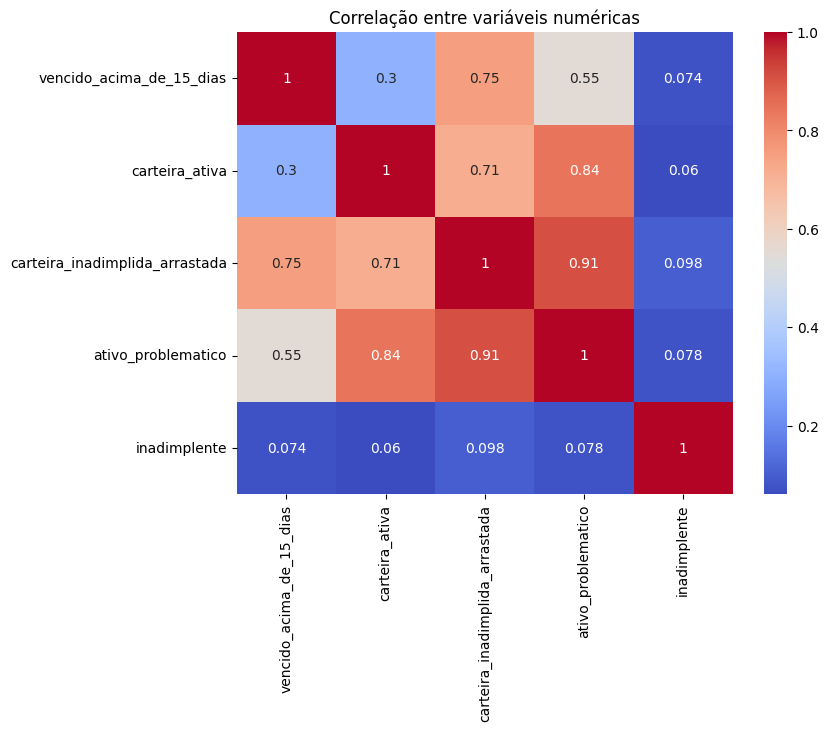

In [28]:
corr = df[['vencido_acima_de_15_dias', 'carteira_ativa', 
           'carteira_inadimplida_arrastada', 'ativo_problematico', 'inadimplente']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()

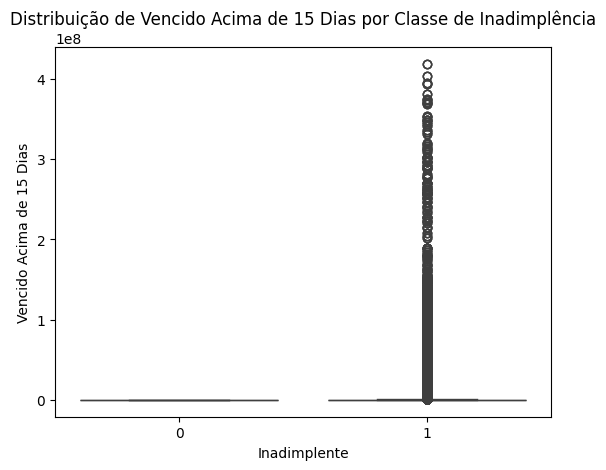